Q-1 Decision Tree
 
Assignment


* About the data: 
* Let’s consider a Company dataset with around 10 variables and 400 records. 
* The attributes are as follows: 
*  Sales -- Unit sales (in thousands) at each location
*  Competitor Price -- Price charged by competitor at each location
*  Income -- Community income level (in thousands of dollars)
*  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
*  Population -- Population size in region (in thousands)
*  Price -- Price company charges for car seats at each site
*  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
*  Age -- Average age of the local population
*  Education -- Education level at each location
*  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
*  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
  The company dataset looks like this: 
 
Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in 

categorical variable) & all other variable will be independent in the analysis. 


In [195]:
# IMPORT LIBRARIES 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# UPLOAD DATA 
df =pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [197]:
# CONVERTING STRING TYPE COLUMNS DATA IN DIGIT FORM 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()        # label encoder we can not use for independent variable bcz this
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])  # as 0,1,2 but we can use onehotcoding
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [198]:
# DATA SIZE 
df.shape

(400, 11)

<AxesSubplot:ylabel='Frequency'>

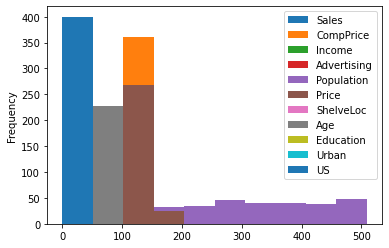

In [199]:
# DATA VISUALIZATION 
df.plot(kind='hist')

<AxesSubplot:>

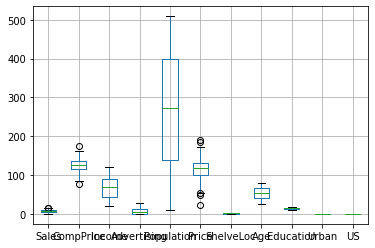

In [200]:
df.boxplot()

<AxesSubplot:>

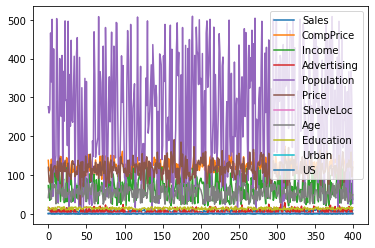

In [201]:
df.plot()

In [202]:
# SPLIT THE DATA IN INDEPENDENT AND DEPENDENT(TARGET) VARIABLE

x=df.iloc[:,1:]
y=df.iloc[:,0]

In [203]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [204]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [205]:
# SPLITING THE DATA IN TRAIN AND TEST 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Decision Tree Regression

In [315]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor,plot_tree


In [324]:
# BUILD THE MODEL
model = DecisionTreeRegressor(max_depth = 5)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [325]:
# MODEL ACCURACY
model.score(x_test,y_test)

0.5074050390941856

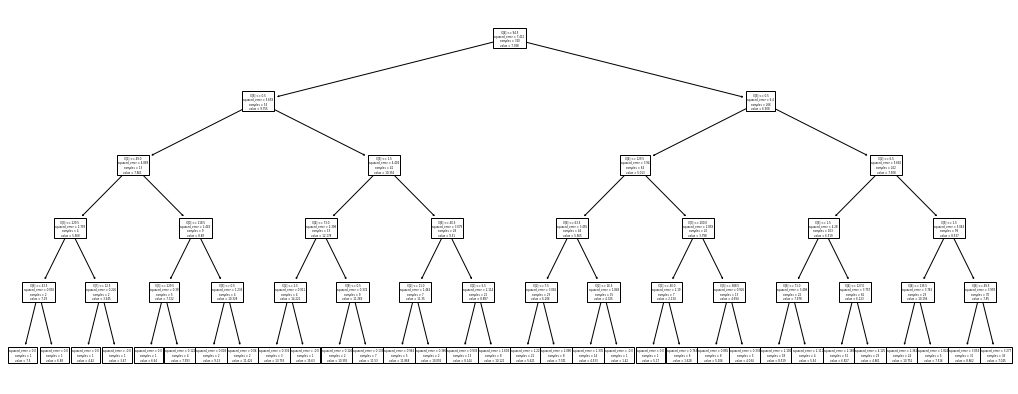

In [327]:
#PLot the decision tree
plt.figure(figsize=(18,7))
plot_tree(model)
plt.show()

***************************************

Q-2-
Use decision trees to prepare a model on fraud data 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

* Undergrad : person is under graduated or not
* Marital.Status : marital status of a person
* Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
* Work Experience : Work experience of an individual person
* Urban : Whether that person belongs to urban area or not



In [264]:
# UPLOAD DATA

df1=pd.read_csv('Fraud_check.csv')
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [265]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [266]:
df1.rename(columns={'Marital.Status':'Marital_Status',
                    'Taxable.Income':'Taxable_Income',
                'City.Population':'City_Population',
                    'Work.Experience':'Work_Experience'},inplace=True)

df1

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [277]:
# CONVERTING STRING TYPE COLUMNS DATA IN DIGIT FORM 

from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()        # label encoder we can not use for independent variable bcz this
df1['Undergrad']= label_encoder1.fit_transform(df1['Undergrad'])  # as 0,1,2 but we can use onehotcoding
df1['Marital_Status']= label_encoder1.fit_transform(df1['Marital_Status'])
df1['Urban']           =             label_encoder1.fit_transform(df1['Urban'])

df1

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


<AxesSubplot:>

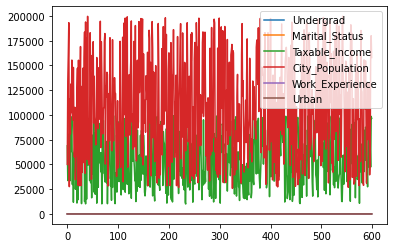

In [278]:
# DATA VISUALIZATION
df1.plot()

<AxesSubplot:>

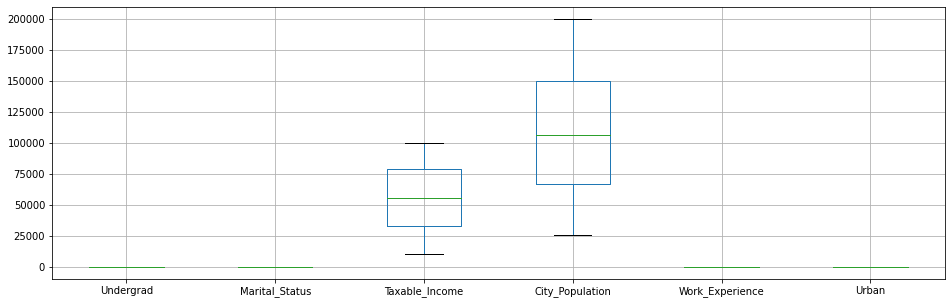

In [279]:
plt.figure(figsize=(16,5))
df1.boxplot()

<AxesSubplot:ylabel='Frequency'>

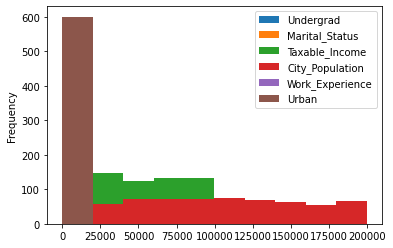

In [280]:
df1.plot(kind='hist')

In [317]:
# SPLIT THE DATA IN INDEPENDENT AND DEPENDENT(TARGET) VARIABLE

y1=df1['Taxable_Income']
x1=df1.drop(['Taxable_Income'], axis=1)

In [318]:
x1

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [319]:
y1

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable_Income, Length: 600, dtype: int64

In [320]:
# SPLITING DATA IN TRAIN AND TEST 

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.30, random_state = 1)

In [321]:
model1 = DecisionTreeRegressor(max_depth = 13)
model1.fit(X_train1, y_train1)

DecisionTreeRegressor(max_depth=13)

In [322]:
#Find the accuracy
model1.score(X_test1,y_test1)

-0.7884626563525174

In [349]:
model1.predict([[0,1,83000,28,0]])

c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([33698.42857143])

* This is giving >30000 texable_income value   its mean given  data it is not fraud data 

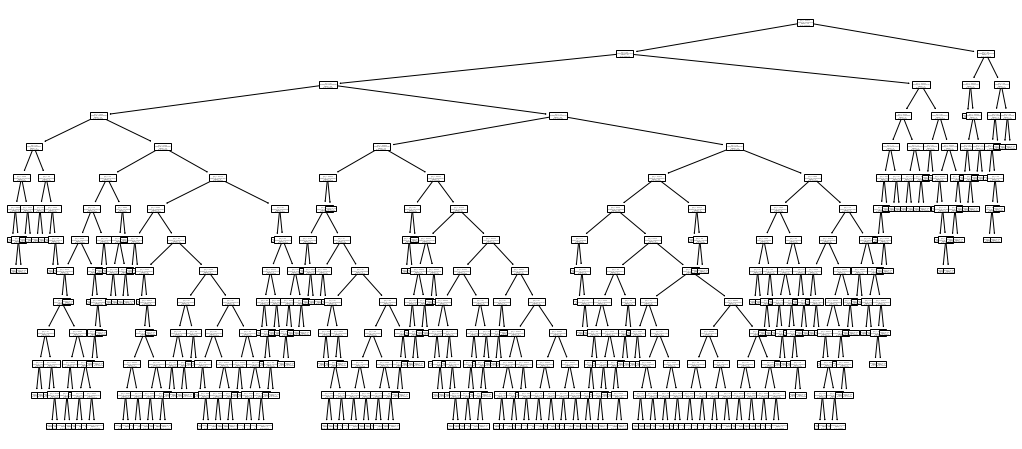

In [328]:
#PLot the decision tree
plt.figure(figsize=(18,8))
plot_tree(model1)
plt.show()